<h1 style = "text-align: center">Airline Data Statistics Final Project</h1>
<p style = "text-align: center"> By: Vansh Sikka </p>

<span style = "color: red">Importing all of the Python tools needed for this project!</span>

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t, binom, geom
import matplotlib.pyplot as plt

**Step 1:** Loading Dataset: 2015 Flight Delays and Cancellations Data

In [9]:
flights = pd.read_csv('../../flights.csv')
pd.set_option('display.max_columns', None)

flights

/Users/vanshsikka/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Section 1: Hypothesis Test 1: 2 Means</h1>
<br/>(Z-test to compare Population Means)<br/>
<br/>
Average arrival delay on flights in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX, praticularly American Airlines and United Airlines

<span style = "color: red">The cells below are utilized to filter through the data and retrieve the Data for the Arrival Delay times for flights in December that are going from ORD to LAX with 2 key airlines: American Airlines and United Airlines </span>

<br/>**Gathering Data**

In [10]:
#Gathering Data
american_arrival = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA'), 'ARRIVAL_DELAY']
#Removing "nan" inputs
american_arrival = american_arrival[~np.isnan(american_arrival)]
print(american_arrival)

5341787   -33.0
5343348   -35.0
5344407     0.0
5346818   -20.0
5348394     2.0
           ... 
5813669    -8.0
5815173   -16.0
5816347    -7.0
5817421    -8.0
5818331     5.0
Name: ARRIVAL_DELAY, Length: 280, dtype: float64


In [11]:
united_arrival = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA'), 'ARRIVAL_DELAY']
#Removing "nan" inputs
united_arrival = united_arrival[~np.isnan(united_arrival)]
print(united_arrival)

5342177   -34.0
5343938   -11.0
5345166   -41.0
5346638   -16.0
5347202    -4.0
           ... 
5812349    -1.0
5813682    -2.0
5815399   -19.0
5816709   -14.0
5817847   -19.0
Name: ARRIVAL_DELAY, Length: 302, dtype: float64


<h3>1.1 Step 0: Check if test assumptions are satisfied.<h3/>

We will calculate the size of the American Airlines sample and the United Airlines sample by finding the number of rows that are in the data set which represents the sample sizes.

In [32]:
american_sample_size = len(american_arrival)
print("American Airline's Sample Size - " + str(american_sample_size) + " greater than or equal to 30: True")
united_sample_size = len(united_arrival)
print("United Airline's Sample Size - " + str(united_sample_size) + " greater than or equal to 30: True")

American Airline's Sample Size - 280 greater than or equal to 30: True
United Airline's Sample Size - 302 greater than or equal to 30: True


**Explanation:** Since n1(American Airlines Sample) = 280 and n2(United Airlines Sample) = 302 are larger than 30 we can preform a Z hypothesis test for two means

<h3>1.2 Step 1: State the Hypotheses<h3/>

**Sample 1:** <p style = "color: blue">American Airlines Arrival Data (AA);</p> **Sample 2:** <p style = "color: red">United Airlines Arrival Data(UA);</p>
<br/><b style = "font-size: 24px"><div style = "text-indent: 15em">H<sub>0</sub> : $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> = 0</div> <div style = "text-indent: 15em">H<sub>1</sub> : $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> $\neq$ 0 </div></b>
<br/>
<p>I chose the alternative hypothesis to be that the difference between the mean arrival delay time of United Airlines and American Airlines to be not equal to 0, because I am concerned with seeing whether there is a difference present between the average arrival delay times between these two airlines in December when traveling from ORD to LAX.</p>

<h3>Box Plot</h3>

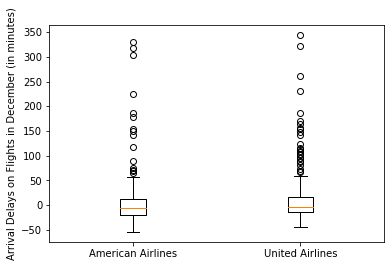

In [13]:
plt.boxplot(np.array([american_arrival, united_arrival], object), labels = ["American Airlines", "United Airlines"])
plt.ylabel("Arrival Delays on Flights in December (in minutes)")
plt.show()

<h3>1.3 Step 2: Compute the Test Statistic</h3>

I will compute the test statistic by using the equation:
<br/>
<p style = "text-align: center; color: blue;">
<span style = "font-size: 20px;">( <sup>x&#772; + y&#772; - (difference in H<sub>0</sub>)</sup>&frasl;<sub><span>&#8730;</span>(<sup>&sigma;<sub>1</sub><sup>2</sup></sup>&frasl;<sub>n<sub>1</sub></sub> + <sup>&sigma;<sub>2</sub><sup>2</sup></sup>&frasl;<sub>n<sub>2</sub></sub>)</sub> )</span>
</p>
<br/>
we can use this equation because with s<sub>1</sub> and s<sub>2</sub> to replace the unkown <span>&sigma;<sub>1</sub></span> and <span>&sigma;<sub>2</sub></span> because we know that n1 and n2 are large.

In [18]:
#Calculate the Test Statistic
american_mean = american_arrival.mean()
united_mean = united_arrival.mean()
american_std = american_arrival.std()
united_std = united_arrival.std()
z_test_statistic = (american_mean - united_mean)/((((american_std**2)/american_sample_size) + ((united_std**2)/united_sample_size))
                                   **0.5)
print("Z Test Statistic: " + str(z_test_statistic))

Z Test Statistic: -1.3926811323141544


<p>Our calculated test statistic is <span style = "color: red">-1.3926811323141544</span>.</p>

<h3>1.4 Step 3: Calculate the P-Value</h3>

I will calculate the p-value of the given test statistic by using norm.cdf(-abs(z_test_statistic)) because that will give me the lower tail probability of observing a sample as extreme or more extreme as our data in the direction of the alternative hypothesis ($\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> $\neq$ 0) given that our null hypothesis $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> = 0 is true. Since the alternative hypothesis is $\neq$, it is a two sided hypothesis test, so I will multiply norm.cdf(-abs(z_test_statistic)) by 2 in order to get the p value.

In [26]:
#Calculate the P-Value
p_value = 2 * norm.cdf(-abs(z_test_statistic))
print("P-Value: " + str(p_value))

P-Value: 0.16371623660393797


Through the calculation above, our P-value is <span style = "color: red">0.16371623660393797</span>.

<h3> 1.5 Step 4: State the Conclusion</h3>
<br/>Since the P-Value (0.16371623660393797) is greater than our Alpha-Level of 0.05, we fail to reject the Null Hypothesis. We can conclude that the data did not provide sufficient evidence that there is a difference in the average amount of time  that the American Airlines flights are delayed at arrival is not equal to the average amount of time that the United Airlines flights are delayed at arrival

<h1>Section 2: Hypothesis Test 2 : 2 Proportions.</h1>
<br/>(Z-test to Compare 2 Population Proportions)
<br/><br/>
Probability of flights delaying over an hour in December from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX.

<h3>2.1 Step 0: Check if test assumptions are satisfied.<h3/>

We will calculate the size of the American Airlines sample and the United Airlines sample by finding the number of rows that are in the data set which represents the sample sizes. In addition to this, we will get the proportions by gathering the mean of all the data points that are greater than 60 minutes (1 hour).

In [33]:
p_hat_american = np.mean(american_arrival > 60)
p_hat_united = np.mean(united_arrival > 60)

#Computing p_hat here
p_hat = ((american_sample_size * p_hat_american) + (united_sample_size * p_hat_united))/(american_sample_size + united_sample_size)
print("Proportion of American Flights that have an Arival Delay of more than 1 hours: " + str(p_hat_american))
print("Proportion of United Flights that have an Arival Delay of more than 1 hours: " + str(p_hat_united))

Proportion of American Flights that have an Arival Delay of more than 1 hours: 0.05357142857142857
Proportion of United Flights that have an Arival Delay of more than 1 hours: 0.08609271523178808


In [34]:
print("# of American flights that had an Arrival Delay of < 1 hour ~ " + str(american_sample_size * p_hat_american) + " greater than or equal to 10 : True\n")
print("# of American flights that didn't have an Arrival Delay < 1 hour ~ " + str(american_sample_size * (1-p_hat_american)) + " greater than or equal to 10 : True\n")
print("# of United flights that had an Arrival Delay < 1 hour ~ " + str(united_sample_size * p_hat_united) + " greater than or equal to 10: True\n")
print("# of United flights that didn't have an Arrival Delay < 1 hour ~ " + str(united_sample_size * (1-p_hat_united)) + " greater than or equal to 10: True")

# of American flights that had an Arrival Delay of < 1 hour ~ 15.0 greater than or equal to 10 : True

# of American flights that didn't have an Arrival Delay < 1 hour ~ 265.0 greater than or equal to 10 : True

# of United flights that had an Arrival Delay < 1 hour ~ 26.0 greater than or equal to 10: True

# of United flights that didn't have an Arrival Delay < 1 hour ~ 276.0 greater than or equal to 10: True


**Explanation:** Since the number of American flights that had an Arrival Delay of more than 1 hour late (15 flights) is greater than 10, and the number of American flights that did not have an Arrival Delay of more than 1 hour (265 flights) is greater than 10. In addition to this, the number of United flights that had an Arrival Delay of more than 1 hour (26 fligths) is greater than 10, and the number of United Flights that did not have an Arrival Delay of more than 1 hour (276 flights) is greater than 10, we can preform a Z Hypothesis Test for 2 Proportions.

<h3>2.2 Step 1: State the Hypotheses<h3/>

**Sample 1:** <p style = "color: blue">American Airlines Arrival Data (AA);</p> **Sample 2:** <p style = "color: red">United Airlines Arrival Data(UA);</p>
<br/><b style = "font-size: 24px"><div style = "text-indent: 15em">H<sub>0</sub> : $p$ <sub>AA</sub> - $p$ <sub>UA</sub> = 0</div> <div style = "text-indent: 15em">H<sub>1</sub> : $p$ <sub>AA</sub> - $p$ <sub>UA</sub> $\neq$ 0 </div></b>
<br/>
I chose $p$ <sub>AA</sub> - $p$ <sub>UA</sub> $\neq$ 0 to be my alternative hypothesis because I want to see if there is a difference present in between the proportion of American Airline flights that had an arrival delay of more than 1 hour in December from ORD to LAX compared to United Airlines.

<h3>2.3 Step 2: Compute the Test Statistic</h3>

I will compute the test statistic by utilizing the formula:
<br/>
<p style = "text-align: center; color: blue;">
<span style = "font-size: 20px;">( <sup>p&#770;<sub>1</sub> - p&#770;<sub>2</sub></sup>&frasl;<sub>&#8730;(p&#770; * ( 1 - p&#770;) * (<sup>1</sup>/<sub>n<sub>1</sub></sub> + <sup>1</sup>/<sub>n<sub>2</sub></sub>))</sub>)</span>
</p>
<br/>    
where p&#770; is equal to: <span style = "color : orange"><sup>(n<sub>1</sub> * p<sub>1</sub> + n<sub>2</sub> * p<sub>2</sub>)</sup>/<sub>n<sub>1</sub> + n<sub>2</sub></sub></span>.

In [35]:
z_test_statistic1 = (p_hat_american - p_hat_united)/((p_hat * (1 - p_hat) * ((1/american_sample_size) + (1/united_sample_size)))**0.5)
print("Z Test Statistic: " + str(z_test_statistic1))

Z Test Statistic: -1.5318672735156422


<p>Our calculated test statistic is <span style = "color: red">-1.5318672735156422</span>.</p>

<h3>2.4 Step 3: Calculate the P-Value</h3>

I will calculate the p-value of the given test statistic by using norm.cdf(-abs(z_test_statistic)) because that will give me the lower tail probability of observing a sample as extreme or more extreme as our data in the direction of the alternative hypothesis ($p$ <sub>AA</sub> - $p$ <sub>UA</sub> $\neq$ 0) given that our null hypothesis ($p$ <sub>AA</sub> - $p$ <sub>UA</sub> = 0) is true. Since the alternative hypothesis is $\neq$, it is a two sided hypothesis test, so I will multiply norm.cdf(-abs(z_test_statistic)) by 2 in order to get the p value.

In [36]:
p_value1 = 2 * norm.cdf(-abs(z_test_statistic1))
print("P-Value: " + str(p_value1))

P-Value: 0.12555519084273978


Through the calculation above, our P-value is <span style = "color: red">0.12555519084273978</span>.

<h3> 2.5 Step 4: State the Conclusion</h3>
<br/>Since the p-value (0.12555519084273978) is greater than our alpha-level of 0.05, we fail to reject the null hypothesis. We can conclude that the data did not provide sufficient evidence that there is a difference in the probability that a American Airlines flight will have an arrival delay of over an hour in comparison to a United Airlines flight in December from ORD to LAX.

<h1>Section 3: Hypothesis Test 3 - My Own Hypothesis Test for 2 Means</h1>
<br/>(Z-test to compare Population Means)<br/><br/>
Average time it takes flights in December to get from O’Hare International Airport (Chicago) ORD to Los Angeles International Airport LAX.

<h2><span style = "color: red">Question:</span> Is there a difference in the average amount of time that United Airlines takes to get from ORD to LAX compared to American Airlines?</h2>

<span style = "color: red">The cells below are utilized to filter through the data and retrieve the data for the elapsed time for flights in December that are going from ORD to LAX with 2 key airlines: American Airlines and United Airlines </span>

**Gather Data**

In [37]:
american_time = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'AA'), 'ELAPSED_TIME']
#Removing "nan" inputs
american_time = american_time[~np.isnan(american_time)]
print(american_time)

5341787    245.0
5343348    242.0
5344407    243.0
5346818    257.0
5348394    229.0
           ...  
5813669    270.0
5815173    258.0
5816347    274.0
5817421    279.0
5818331    279.0
Name: ELAPSED_TIME, Length: 280, dtype: float64


In [38]:
united_time = flights.loc[(flights['MONTH'] == 12) & (flights['ORIGIN_AIRPORT'] == 'ORD') & (flights['DESTINATION_AIRPORT'] == 'LAX') &
           (flights['AIRLINE'] == 'UA'), 'ELAPSED_TIME']
#Removing "nan" inputs
united_time = united_time[~np.isnan(united_time)]
print(united_time)

5342177    249.0
5343938    245.0
5345166    242.0
5346638    255.0
5347202    244.0
           ...  
5812349    279.0
5813682    277.0
5815399    263.0
5816709    262.0
5817847    259.0
Name: ELAPSED_TIME, Length: 302, dtype: float64


<h3>3.1 Step 0: Check if test assumptions are satisfied.<h3/>

We will calculate the size of the American Airlines sample and the United Airlines sample by finding the number of rows that are in the data set which represents the sample sizes.

In [39]:
#2.1 Step 0: Check if test assumptions are satisfied.
american_sample_size2 = len(american_time)
print("American Airline's Sample Size - " + str(american_sample_size2) + " greater than or equal to 30: True")
united_sample_size2 = len(united_time)
print("United Airline's Sample Size - " + str(united_sample_size2) + " greater than or equal to 30: True")

American Airline's Sample Size - 280 greater than or equal to 30: True
United Airline's Sample Size - 302 greater than or equal to 30: True


**Explanation:** Since n1(American Airlines Sample) = 280 and n2(United Airlines Sample) = 302 are large we can preform a Z hypothesis test for two means.


<h3> 3.2 Step 1: State the Hypotheses</h3>

**Sample 1:** <p style = "color: blue">American Airlines Arrival Data (AA);</p> **Sample 2:** <p style = "color: red">United Airlines Arrival Data(UA);</p>
<br/><b style = "font-size: 24px"><div style = "text-indent: 15em">H<sub>0</sub> : $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> = 0</div> <div style = "text-indent: 15em">H<sub>1</sub> : $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> $\neq$ 0 </div></b><br/>
<p>I chose the alternative hypothesis to be that the difference between the mean elapsed time of United Airlines and American Airlines to be not equal to 0, because I am concerned with seeing whether there is a difference present between the average elapsed time that it takes to get from ORD to LAX in December between these two airlines.</p>

<h3>3.3 Step 2: Compute the Test Statistic</h3>

I will compute the test statistic by using the equation:
<br/>
<p style = "text-align: center; color: blue;">
<span style = "font-size: 20px;">( <sup>x&#772; + y&#772; - (difference in H<sub>0</sub>)</sup>&frasl;<sub><span>&#8730;</span>(<sup>&sigma;<sub>1</sub><sup>2</sup></sup>&frasl;<sub>n<sub>1</sub></sub> + <sup>&sigma;<sub>2</sub><sup>2</sup></sup>&frasl;<sub>n<sub>2</sub></sub>)</sub> )</span>
</p>
<br/>
we can use this equation because with s<sub>1</sub> and s<sub>2</sub> to replace the unkown <span>&sigma;<sub>1</sub></span> and <span>&sigma;<sub>2</sub></span> because we know that n1 and n2 are large.

In [40]:
#Calculate the Test Statistic
american_mean2 = american_time.mean()
united_mean2 = united_time.mean()
american_std2 = american_time.std()
united_std2 = united_time.std()
z_test_statistic2 = (american_mean2 - united_mean2)/((((american_std2**2)/american_sample_size2) + ((united_std2**2)/united_sample_size2))
                                   **0.5)
print("Z Test Statistic: " + str(z_test_statistic2))

Z Test Statistic: 0.2590741598585915


<p>Our calculated test statistic is <span style = "color: red">0.2590741598585915</span>.</p>

<h3>3.4 Step 3: Calculate the P-Value</h3>

I will calculate the p-value of the given test statistic by using norm.cdf(-abs(z_test_statistic)) because that will give me the lower tail probability of observing a sample as extreme or more extreme as our data in the direction of the alternative hypothesis ($\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> $\neq$ 0) given that our null hypothesis $\mu$ <sub>AA</sub> - $\mu$ <sub>UA</sub> = 0 is true. Since the alternative hypothesis is $\neq$, it is a two sided hypothesis test, so I will multiply norm.cdf(-abs(z_test_statistic)) by 2 in order to get the p value.

In [43]:
#Calculate the P-Value
p_value2 = 2 * norm.cdf(-abs(z_test_statistic2))
print("P-Value: " + str(p_value2))

P-Value: 0.7955780217474884


Through the calculation above, our P-value is <span style = "color: red">0.7955780217474884</span>.

<h3> 3.5 Step 4: State the Conclusion</h3>
<br/>Since the P-Value (0.7955780217474884) is greater than our Alpha-Level of 0.05, we fail to reject the Null Hypothesis.We can conclude that the data did not provide sufficient evidence that there is a difference in the average amount of time  that the American Airlines flights are delayed at departure is not equal to the average amount of time that the United Airlines flights are delayed at departure.

<h1>Section 4: Multiple Comparisons</h1>

Since these 3 hypothesis tests were all conducted from the same data set, we know that the family wise error rate is m*alpha which simply makes it 3 * 0.05 = 0.15. This means that the probability of making a type 1 error is actually 15% not 5%, so in order to accomodate for this we use Boneferroni Correction and find a new alpha which is equal to alpha/m.

In [47]:
bonferroni_alpha = 0.05/3
bonferroni_alpha

0.016666666666666666

This leads our new alpha level to be 0.01666, so now we must re-analyze all of the hypothesis tests that we conducted.

<span style = "color: red"> Since our P-values stay the same regardless of the alpha level, we simply need to redraw our conclusions based off of this new alpha level</span>

<h3>Hypothesis Test 1 Re-evaluation with Alpha-level 0.0166:</h3>
<br/>
<p>P-value (Calculation shown above in Section 1): <span style = "color: blue">0.16371623660393797</span></p>
<br/>
<b>Conclusion</b>: Since the p-value (0.16371623660393797) is greater than our alpha-level of 0.0166, we fail to reject the null hypothesis. We can conclude that the data did not provide sufficient evidence that there is a difference in the average amount of time that the American Airlines flights are delayed at arrival is not equal to the average amount of time that the United Airlines flights are delayed at arrival

<h3>Hypothesis Test 2 Re-evaluation with Alpha-level 0.0166:</h3>
<br/>
<p>P-value (Calculation shown above in Section 2): <span style = "color: blue">0.12555519084273978</span></p>
<br/>
<b>Conclusion</b>: Since the p-value (0.12555519084273978) is greater than our alpha-level of 0.016666, we fail to reject the null hypothesis. We can conclude that the data did not provide sufficient evidence that there is a difference in the probability that a American Airlines flight will have an arrival delay of over an hour in comparison to a United Airlines flight in December from ORD to LAX.

<h3>Hypothesis Test 3 Re-evaluation with Alpha-level 0.0166:</h3>
<br/>
<p>P-value (Calculation shown above in Section 3): <span style = "color: blue">0.7955780217474884</span></p>
<br/>
<b>Conclusion</b>: Since the p-value (0.7955780217474884) is greater than our alpha-level of 0.016666, we fail to reject the Null Hypothesis.We can conclude that the data did not provide sufficient evidence that there is a difference in the average amount of time that the American Airlines flights are delayed at departure is not equal to the average amount of time that the United Airlines flights are delayed at departure